In [2]:
# Execute apenas se der erro de importação
!pip install tensorflow


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import zipfile
import os

import tensorflow_datasets as tfds
# Carrega o dataset cats_vs_dogs
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.Z9BIDA_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
IMG_SIZE = 160  # MobileNetV2 requer imagens 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image /= 255.0  # normaliza entre 0 e 1
    return image, label

train = ds_train.map(format_example).batch(32).prefetch(1)
val = ds_val.map(format_example).batch(32).prefetch(1)


In [5]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # congelar pesos

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train, validation_data=val, epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 459s 778ms/step - accuracy: 0.9419 - loss: 0.1477 - val_accuracy: 0.9791 - val_loss: 0.0615
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 504s 781ms/step - accuracy: 0.9801 - loss: 0.0585 - val_accuracy: 0.9811 - val_loss: 0.0578
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 506s 869ms/step - accuracy: 0.9823 - loss: 0.0519 - val_accuracy: 0.9809 - val_loss: 0.0574
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 451s 775ms/step - accuracy: 0.9836 - loss: 0.0478 - val_accuracy: 0.9807 - val_loss: 0.0577
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 505s 779ms/step - accuracy: 0.9853 - loss: 0.0445 - val_accuracy: 0.9809 - val_loss: 0.0584


In [7]:
model.save("modelo_transfer_learning_cats_vs_dogs.h5")

In [8]:
model.save('modelo_cats_dogs.keras')


In [9]:
from google.colab import files
uploaded = files.upload()


Saving pompom.jpg to pompom.jpg
Saving poly.jpg to poly.jpg
Saving tomy.png to tomy.png


In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

IMG_SIZE = 160  # mesmo usado no treinamento

def preparar_imagem(file_path):
    img = image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # cria um "batch" com 1 imagem
    img_array /= 255.0  # normalização igual ao treinamento
    return img_array


In [11]:
modelo = tf.keras.models.load_model("modelo_cats_dogs.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
imagens = ["poly.jpg", "pompom.jpg", "tomy.jpg"]

for nome_arquivo in imagens:
    imagem = preparar_imagem(nome_arquivo)
    pred = modelo.predict(imagem)
    classe = "Cachorro 🐶" if pred[0][0] > 0.5 else "Gato 🐱"
    confianca = pred[0][0] if pred[0][0] > 0.5 else 1 - pred[0][0]

    print(f"Imagem: {nome_arquivo} | Predição: {classe} | Confiança: {confianca:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


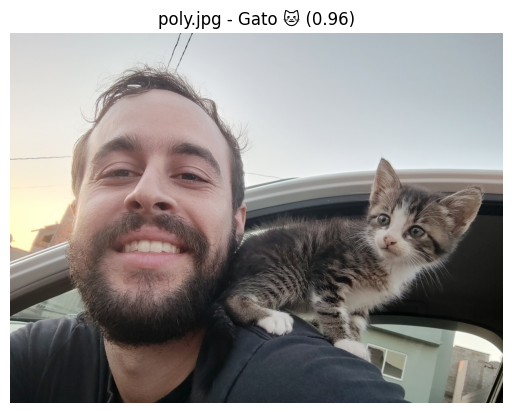

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


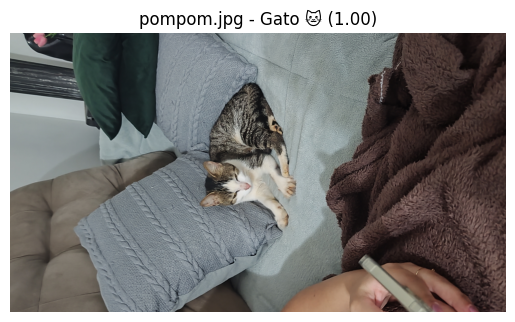

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


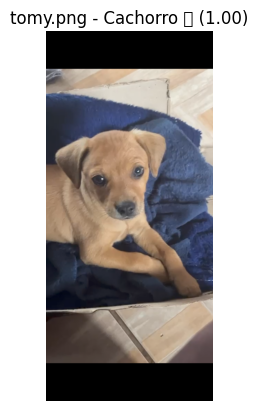

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

IMG_SIZE = 160  # mesmo usado no treino

def preparar_imagem(file_path):
    img = image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # cria um batch com 1 imagem
    img_array /= 255.0
    return img_array

# Lista das imagens que você enviou
imagens = ["poly.jpg", "pompom.jpg", "tomy.png"]

for nome_arquivo in imagens:
    try:
        # Pré-processa a imagem e faz a predição
        imagem = preparar_imagem(nome_arquivo)
        pred = modelo.predict(imagem)
        classe = "Cachorro 🐶" if pred[0][0] > 0.5 else "Gato 🐱"
        confianca = pred[0][0] if pred[0][0] > 0.5 else 1 - pred[0][0]

        # Mostra a imagem com a predição no título
        img = Image.open(nome_arquivo)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{nome_arquivo} - {classe} ({confianca:.2f})")
        plt.show()

    except Exception as e:
        print(f"Erro ao processar {nome_arquivo}: {e}")


In [14]:
from google.colab import files
uploaded = files.upload()

Saving tomy2.JPG to tomy2.JPG


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


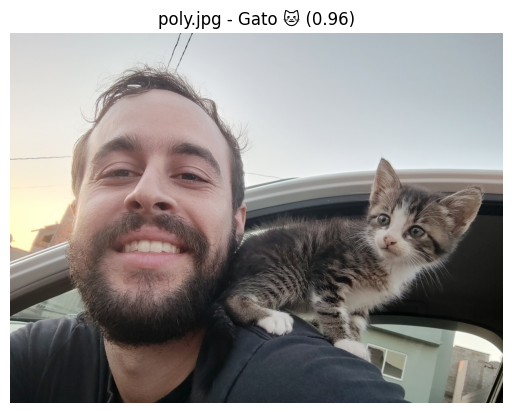

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


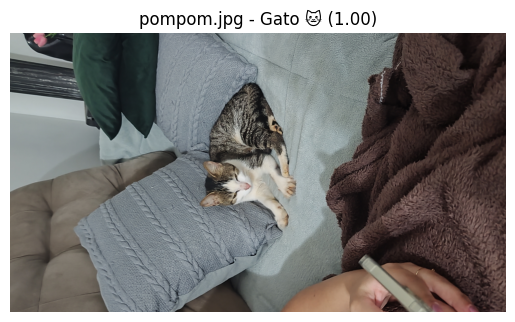

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


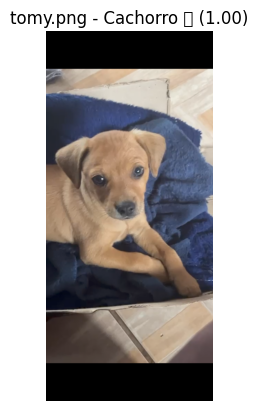

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


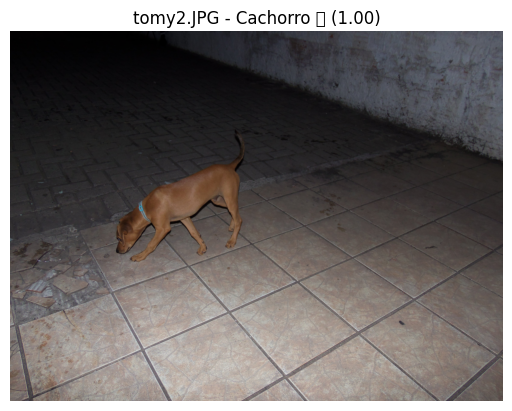

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

IMG_SIZE = 160  # mesmo usado no treino

def preparar_imagem(file_path):
    img = image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # cria um batch com 1 imagem
    img_array /= 255.0
    return img_array

# Lista das imagens que você enviou
imagens = ["poly.jpg", "pompom.jpg", "tomy.png", "tomy2.JPG"]

for nome_arquivo in imagens:
    try:
        # Pré-processa a imagem e faz a predição
        imagem = preparar_imagem(nome_arquivo)
        pred = modelo.predict(imagem)
        classe = "Cachorro 🐶" if pred[0][0] > 0.5 else "Gato 🐱"
        confianca = pred[0][0] if pred[0][0] > 0.5 else 1 - pred[0][0]

        # Mostra a imagem com a predição no título
        img = Image.open(nome_arquivo)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{nome_arquivo} - {classe} ({confianca:.2f})")
        plt.show()

    except Exception as e:
        print(f"Erro ao processar {nome_arquivo}: {e}")